In [1]:
import pandas as pd
import os
os.environ["MODIN_ENGINE"] = "ray"
os.environ["MODIN_ENGINE"] = "dask"

In [2]:
%%time
data_pd=pd.read_csv('household_power_consumption.txt',sep=';')

<decorator-gen-61>:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.


CPU times: user 1.56 s, sys: 126 ms, total: 1.68 s
Wall time: 1.68 s


In [3]:
data_pd.shape

(2075259, 9)

In [4]:
data_pd.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
import modin.pandas as pd1

In [6]:
%%time
data_modin=pd1.read_csv('household_power_consumption.txt',sep=';')


CPU times: user 443 ms, sys: 105 ms, total: 547 ms
Wall time: 1.03 s


In [7]:
data_modin.shape

(2075259, 9)

In [8]:
data_modin.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [37]:
data_pd.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [19]:
%%time 
data_pd.dtypes

CPU times: user 272 µs, sys: 7 µs, total: 279 µs
Wall time: 278 µs


Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [9]:
%%time
data_modin.dtypes

CPU times: user 19 µs, sys: 1 µs, total: 20 µs
Wall time: 23.8 µs


Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

# Looks like columns (2 to 7 should be float instead of type object) and column 0 should be datetime instead of object

In [46]:

data_pd = data_pd.astype({'Global_active_power':'float',
                            'Global_reactive_power':'float','Voltage':'float',
                             'Sub_metering_1':'float','Sub_metering_2' :'float'                 
                                     })

ValueError: could not convert string to float: '?'

In [10]:
lst=[]
for index,value in data_pd['Global_active_power'].iteritems():
    try:
        b=float(value)
        
    except :
        print ('exception for index {},value {} '.format(index,value))
        lst.append(index)
    

exception for index 6839,value ? 
exception for index 6840,value ? 
exception for index 19724,value ? 
exception for index 19725,value ? 
exception for index 41832,value ? 
exception for index 61909,value ? 
exception for index 98254,value ? 
exception for index 98255,value ? 
exception for index 142588,value ? 
exception for index 190497,value ? 
exception for index 190498,value ? 
exception for index 190499,value ? 
exception for index 190500,value ? 
exception for index 190501,value ? 
exception for index 190502,value ? 
exception for index 190503,value ? 
exception for index 190504,value ? 
exception for index 190505,value ? 
exception for index 190506,value ? 
exception for index 190507,value ? 
exception for index 190508,value ? 
exception for index 190509,value ? 
exception for index 190510,value ? 
exception for index 190511,value ? 
exception for index 190512,value ? 
exception for index 190513,value ? 
exception for index 190514,value ? 
exception for index 190515,value ? 
ex

exception for index 191905,value ? 
exception for index 191906,value ? 
exception for index 191907,value ? 
exception for index 191908,value ? 
exception for index 191909,value ? 
exception for index 191910,value ? 
exception for index 191911,value ? 
exception for index 191912,value ? 
exception for index 191913,value ? 
exception for index 191914,value ? 
exception for index 191915,value ? 
exception for index 191916,value ? 
exception for index 191917,value ? 
exception for index 191918,value ? 
exception for index 191919,value ? 
exception for index 191920,value ? 
exception for index 191921,value ? 
exception for index 191922,value ? 
exception for index 191923,value ? 
exception for index 191924,value ? 
exception for index 191925,value ? 
exception for index 191926,value ? 
exception for index 191927,value ? 
exception for index 191928,value ? 
exception for index 191929,value ? 
exception for index 191930,value ? 
exception for index 191931,value ? 
exception for index 191932,v

exception for index 193404,value ? 
exception for index 193405,value ? 
exception for index 193406,value ? 
exception for index 193407,value ? 
exception for index 193408,value ? 
exception for index 193409,value ? 
exception for index 193410,value ? 
exception for index 193411,value ? 
exception for index 193412,value ? 
exception for index 193413,value ? 
exception for index 193414,value ? 
exception for index 193415,value ? 
exception for index 193416,value ? 
exception for index 193417,value ? 
exception for index 193418,value ? 
exception for index 193419,value ? 
exception for index 193420,value ? 
exception for index 193421,value ? 
exception for index 193422,value ? 
exception for index 193423,value ? 
exception for index 193424,value ? 
exception for index 193425,value ? 
exception for index 193426,value ? 
exception for index 193427,value ? 
exception for index 193428,value ? 
exception for index 193429,value ? 
exception for index 193430,value ? 
exception for index 193431,v

exception for index 361499,value ? 
exception for index 409171,value ? 
exception for index 409172,value ? 
exception for index 448109,value ? 
exception for index 448110,value ? 
exception for index 489820,value ? 
exception for index 500253,value ? 
exception for index 527327,value ? 
exception for index 566016,value ? 
exception for index 594663,value ? 
exception for index 624535,value ? 
exception for index 624536,value ? 
exception for index 667918,value ? 
exception for index 744599,value ? 
exception for index 744600,value ? 
exception for index 784888,value ? 
exception for index 828182,value ? 
exception for index 828183,value ? 
exception for index 859659,value ? 
exception for index 898637,value ? 
exception for index 977344,value ? 
exception for index 977345,value ? 
exception for index 977346,value ? 
exception for index 977347,value ? 
exception for index 977348,value ? 
exception for index 977349,value ? 
exception for index 977350,value ? 
exception for index 977351,v

exception for index 1310658,value ? 
exception for index 1310659,value ? 
exception for index 1310660,value ? 
exception for index 1310661,value ? 
exception for index 1310662,value ? 
exception for index 1310663,value ? 
exception for index 1310664,value ? 
exception for index 1310665,value ? 
exception for index 1310666,value ? 
exception for index 1310667,value ? 
exception for index 1310668,value ? 
exception for index 1310669,value ? 
exception for index 1310670,value ? 
exception for index 1310671,value ? 
exception for index 1310672,value ? 
exception for index 1310673,value ? 
exception for index 1310674,value ? 
exception for index 1310675,value ? 
exception for index 1310676,value ? 
exception for index 1310677,value ? 
exception for index 1310678,value ? 
exception for index 1310679,value ? 
exception for index 1310680,value ? 
exception for index 1310681,value ? 
exception for index 1310682,value ? 
exception for index 1310683,value ? 
exception for index 1310684,value ? 
e

exception for index 1312491,value ? 
exception for index 1312492,value ? 
exception for index 1312493,value ? 
exception for index 1312494,value ? 
exception for index 1312495,value ? 
exception for index 1312496,value ? 
exception for index 1312497,value ? 
exception for index 1312498,value ? 
exception for index 1312499,value ? 
exception for index 1312500,value ? 
exception for index 1312501,value ? 
exception for index 1312502,value ? 
exception for index 1312503,value ? 
exception for index 1312504,value ? 
exception for index 1312505,value ? 
exception for index 1312506,value ? 
exception for index 1312507,value ? 
exception for index 1312508,value ? 
exception for index 1312509,value ? 
exception for index 1312510,value ? 
exception for index 1312511,value ? 
exception for index 1312512,value ? 
exception for index 1312513,value ? 
exception for index 1312514,value ? 
exception for index 1312515,value ? 
exception for index 1312516,value ? 
exception for index 1312517,value ? 
e

exception for index 1525155,value ? 
exception for index 1569062,value ? 
exception for index 1569063,value ? 
exception for index 1602807,value ? 
exception for index 1616969,value ? 
exception for index 1616970,value ? 
exception for index 1616971,value ? 
exception for index 1616972,value ? 
exception for index 1616973,value ? 
exception for index 1616974,value ? 
exception for index 1616975,value ? 
exception for index 1616976,value ? 
exception for index 1616977,value ? 
exception for index 1616978,value ? 
exception for index 1616979,value ? 
exception for index 1616980,value ? 
exception for index 1616981,value ? 
exception for index 1616982,value ? 
exception for index 1616983,value ? 
exception for index 1616984,value ? 
exception for index 1616985,value ? 
exception for index 1616986,value ? 
exception for index 1616987,value ? 
exception for index 1616988,value ? 
exception for index 1616989,value ? 
exception for index 1616990,value ? 
exception for index 1616991,value ? 
e

exception for index 1618531,value ? 
exception for index 1618532,value ? 
exception for index 1618533,value ? 
exception for index 1618534,value ? 
exception for index 1618535,value ? 
exception for index 1618536,value ? 
exception for index 1618537,value ? 
exception for index 1618538,value ? 
exception for index 1618539,value ? 
exception for index 1618540,value ? 
exception for index 1618541,value ? 
exception for index 1618542,value ? 
exception for index 1618543,value ? 
exception for index 1618544,value ? 
exception for index 1618545,value ? 
exception for index 1618546,value ? 
exception for index 1618547,value ? 
exception for index 1618548,value ? 
exception for index 1618549,value ? 
exception for index 1618550,value ? 
exception for index 1618551,value ? 
exception for index 1618552,value ? 
exception for index 1618553,value ? 
exception for index 1618554,value ? 
exception for index 1618555,value ? 
exception for index 1618556,value ? 
exception for index 1618557,value ? 
e

exception for index 1658253,value ? 
exception for index 1664879,value ? 
exception for index 1712788,value ? 
exception for index 1712789,value ? 
exception for index 1712790,value ? 
exception for index 1712791,value ? 
exception for index 1712792,value ? 
exception for index 1712793,value ? 
exception for index 1712794,value ? 
exception for index 1712795,value ? 
exception for index 1712796,value ? 
exception for index 1712797,value ? 
exception for index 1712798,value ? 
exception for index 1712799,value ? 
exception for index 1712800,value ? 
exception for index 1712801,value ? 
exception for index 1712802,value ? 
exception for index 1712803,value ? 
exception for index 1712804,value ? 
exception for index 1712805,value ? 
exception for index 1712806,value ? 
exception for index 1712807,value ? 
exception for index 1712808,value ? 
exception for index 1712809,value ? 
exception for index 1712810,value ? 
exception for index 1712811,value ? 
exception for index 1712812,value ? 
e

exception for index 1714217,value ? 
exception for index 1714218,value ? 
exception for index 1714219,value ? 
exception for index 1714220,value ? 
exception for index 1714221,value ? 
exception for index 1714222,value ? 
exception for index 1714223,value ? 
exception for index 1714224,value ? 
exception for index 1714225,value ? 
exception for index 1714226,value ? 
exception for index 1714227,value ? 
exception for index 1714228,value ? 
exception for index 1714229,value ? 
exception for index 1714230,value ? 
exception for index 1714231,value ? 
exception for index 1714232,value ? 
exception for index 1714233,value ? 
exception for index 1714234,value ? 
exception for index 1714235,value ? 
exception for index 1714236,value ? 
exception for index 1714237,value ? 
exception for index 1714238,value ? 
exception for index 1714239,value ? 
exception for index 1714240,value ? 
exception for index 1714241,value ? 
exception for index 1714242,value ? 
exception for index 1714243,value ? 
e

exception for index 1930215,value ? 
exception for index 1930216,value ? 
exception for index 1930217,value ? 
exception for index 1930218,value ? 
exception for index 1930219,value ? 
exception for index 1930220,value ? 
exception for index 1930221,value ? 
exception for index 1930222,value ? 
exception for index 1930223,value ? 
exception for index 1930224,value ? 
exception for index 1930225,value ? 
exception for index 1930226,value ? 
exception for index 1930227,value ? 
exception for index 1930228,value ? 
exception for index 1930229,value ? 
exception for index 1930230,value ? 
exception for index 1930231,value ? 
exception for index 1930232,value ? 
exception for index 1930233,value ? 
exception for index 1930234,value ? 
exception for index 1930235,value ? 
exception for index 1930236,value ? 
exception for index 1930237,value ? 
exception for index 1930238,value ? 
exception for index 1930239,value ? 
exception for index 1930240,value ? 
exception for index 1930241,value ? 
e

exception for index 1932214,value ? 
exception for index 1932215,value ? 
exception for index 1932216,value ? 
exception for index 1932217,value ? 
exception for index 1932218,value ? 
exception for index 1932219,value ? 
exception for index 1932220,value ? 
exception for index 1932221,value ? 
exception for index 1932222,value ? 
exception for index 1932223,value ? 
exception for index 1932224,value ? 
exception for index 1932225,value ? 
exception for index 1932226,value ? 
exception for index 1932227,value ? 
exception for index 1932228,value ? 
exception for index 1932229,value ? 
exception for index 1932230,value ? 
exception for index 1932231,value ? 
exception for index 1932232,value ? 
exception for index 1932233,value ? 
exception for index 1932234,value ? 
exception for index 1932235,value ? 
exception for index 1932236,value ? 
exception for index 1932237,value ? 
exception for index 1932238,value ? 
exception for index 1932239,value ? 
exception for index 1932240,value ? 
e

exception for index 1934206,value ? 
exception for index 1934207,value ? 
exception for index 1934208,value ? 
exception for index 1934209,value ? 
exception for index 1934210,value ? 
exception for index 1934211,value ? 
exception for index 1934212,value ? 
exception for index 1934213,value ? 
exception for index 1934214,value ? 
exception for index 1934215,value ? 
exception for index 1934216,value ? 
exception for index 1934217,value ? 
exception for index 1934218,value ? 
exception for index 1934219,value ? 
exception for index 1934220,value ? 
exception for index 1934221,value ? 
exception for index 1934222,value ? 
exception for index 1934223,value ? 
exception for index 1934224,value ? 
exception for index 1934225,value ? 
exception for index 1934226,value ? 
exception for index 1934227,value ? 
exception for index 1934228,value ? 
exception for index 1934229,value ? 
exception for index 1934230,value ? 
exception for index 1934231,value ? 
exception for index 1934232,value ? 
e

exception for index 1935713,value ? 
exception for index 1935714,value ? 
exception for index 1935715,value ? 
exception for index 1935716,value ? 
exception for index 1935717,value ? 
exception for index 1935718,value ? 
exception for index 1935719,value ? 
exception for index 1935720,value ? 
exception for index 1935721,value ? 
exception for index 1935722,value ? 
exception for index 1935723,value ? 
exception for index 1935724,value ? 
exception for index 1935725,value ? 
exception for index 1935726,value ? 
exception for index 1935727,value ? 
exception for index 1935728,value ? 
exception for index 1935729,value ? 
exception for index 1935730,value ? 
exception for index 1935731,value ? 
exception for index 1935732,value ? 
exception for index 1935733,value ? 
exception for index 1935734,value ? 
exception for index 1935735,value ? 
exception for index 1935736,value ? 
exception for index 1935737,value ? 
exception for index 1935738,value ? 
exception for index 1935739,value ? 
e

exception for index 1985121,value ? 
exception for index 1985122,value ? 
exception for index 1985123,value ? 
exception for index 1985124,value ? 
exception for index 1985125,value ? 
exception for index 1985126,value ? 
exception for index 1985127,value ? 
exception for index 1985128,value ? 
exception for index 1985129,value ? 
exception for index 1985130,value ? 
exception for index 1985131,value ? 
exception for index 1985132,value ? 
exception for index 1985133,value ? 
exception for index 1985134,value ? 
exception for index 1985135,value ? 
exception for index 1985136,value ? 
exception for index 1985137,value ? 
exception for index 1985138,value ? 
exception for index 1985139,value ? 
exception for index 1985140,value ? 
exception for index 1985141,value ? 
exception for index 1985142,value ? 
exception for index 1985143,value ? 
exception for index 1985144,value ? 
exception for index 1985145,value ? 
exception for index 1985146,value ? 
exception for index 1985147,value ? 
e

exception for index 1986764,value ? 
exception for index 1986765,value ? 
exception for index 1986766,value ? 
exception for index 1986767,value ? 
exception for index 1986768,value ? 
exception for index 1986769,value ? 
exception for index 1986770,value ? 
exception for index 1986771,value ? 
exception for index 1986772,value ? 
exception for index 1986773,value ? 
exception for index 1986774,value ? 
exception for index 1986775,value ? 
exception for index 1986776,value ? 
exception for index 1986777,value ? 
exception for index 1986778,value ? 
exception for index 1986779,value ? 
exception for index 1986780,value ? 
exception for index 1986781,value ? 
exception for index 1986782,value ? 
exception for index 1986783,value ? 
exception for index 1986784,value ? 
exception for index 1986785,value ? 
exception for index 1986786,value ? 
exception for index 1986787,value ? 
exception for index 1986788,value ? 
exception for index 1986789,value ? 
exception for index 1986790,value ? 
e

exception for index 1988620,value ? 
exception for index 1988621,value ? 
exception for index 1988622,value ? 
exception for index 1988623,value ? 
exception for index 1988624,value ? 
exception for index 1988625,value ? 
exception for index 1988626,value ? 
exception for index 1988627,value ? 
exception for index 1988628,value ? 
exception for index 1988629,value ? 
exception for index 1988630,value ? 
exception for index 1988631,value ? 
exception for index 1988632,value ? 
exception for index 1988633,value ? 
exception for index 1988634,value ? 
exception for index 1988635,value ? 
exception for index 1988636,value ? 
exception for index 1988637,value ? 
exception for index 1988638,value ? 
exception for index 1988639,value ? 
exception for index 1988640,value ? 
exception for index 1988641,value ? 
exception for index 1988642,value ? 
exception for index 1988643,value ? 
exception for index 1988644,value ? 
exception for index 1988645,value ? 
exception for index 1988646,value ? 
e

exception for index 2027411,value ? 


In [11]:
%%time
data_pd.loc[lst,:]

CPU times: user 18.8 ms, sys: 1.77 ms, total: 20.5 ms
Wall time: 18.9 ms


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,?,?,?,?,?,?,NaN
1990186,28/9/2010,19:10:00,?,?,?,?,?,?,NaN
1990187,28/9/2010,19:11:00,?,?,?,?,?,?,NaN
1990188,28/9/2010,19:12:00,?,?,?,?,?,?,NaN


In [12]:
%%time 
data_modin.loc[lst,:]

CPU times: user 54.9 ms, sys: 4.4 ms, total: 59.3 ms
Wall time: 57.2 ms


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,?,?,?,?,?,?,NaN
1990186,28/9/2010,19:10:00,?,?,?,?,?,?,NaN
1990187,28/9/2010,19:11:00,?,?,?,?,?,?,NaN
1990188,28/9/2010,19:12:00,?,?,?,?,?,?,NaN


In [13]:
%%time
data_pd.drop(lst,axis=0,inplace=True)

CPU times: user 210 ms, sys: 45.3 ms, total: 255 ms
Wall time: 247 ms


In [14]:
%%time
data_modin.drop(lst,axis=0,inplace=True)

CPU times: user 1.59 s, sys: 103 ms, total: 1.69 s
Wall time: 1.65 s


In [15]:
%%time

data_pd = data_pd.astype({'Global_active_power':'float',
                            'Global_reactive_power':'float','Voltage':'float',
                             'Sub_metering_1':'float','Sub_metering_2' :'float', 'Date':'datetime64',                 
                             'Global_intensity':'float'        })

CPU times: user 1.07 s, sys: 73.7 ms, total: 1.15 s
Wall time: 1.13 s


In [16]:
%%time 

data_modin = data_modin.astype({'Global_active_power':'float',
                            'Global_reactive_power':'float','Voltage':'float',
                             'Sub_metering_1':'float','Sub_metering_2' :'float','Date':'datetime64',
                                'Global_intensity':'float'                 
                                     })

CPU times: user 38.3 ms, sys: 4.98 ms, total: 43.3 ms
Wall time: 41.2 ms


In [35]:
data_pd.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049280 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 156.3+ MB


In [33]:
data_modin.info()

<class 'modin.pandas.dataframe.DataFrame'>
Int64Index: 2049280 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype     
---  ---------------------  ----------------  -----     
 0   Date                   2049280 non-null  datetime64
 1   Time                   2049280 non-null  object
 2   Global_active_power    2049280 non-null  float64
 3   Global_reactive_power  2049280 non-null  float64
 4   Voltage                2049280 non-null  float64
 5   Global_intensity       2049280 non-null  float64
 6   Sub_metering_1         2049280 non-null  float64
 7   Sub_metering_2         2049280 non-null  float64
 8   Sub_metering_3         2049280 non-null  float64
dtypes: float64(7), object(1), datetime64(1)
memory usage: 156.3 MB


In [27]:
%%time
data_pd.isnull().sum()

CPU times: user 129 ms, sys: 16.9 ms, total: 146 ms
Wall time: 136 ms


Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
year                     0
dtype: int64

In [28]:
%%time 
data_modin.isnull().sum()

CPU times: user 92.7 ms, sys: 9.56 ms, total: 102 ms
Wall time: 223 ms


Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
year                     0
dtype: int64

In [54]:
data_pd.Date.min()
import numpy as np

In [21]:
%%time 
data_pd['year'] = pd.DatetimeIndex(data_pd['Date']).year

CPU times: user 68.7 ms, sys: 2.35 ms, total: 71.1 ms
Wall time: 63.3 ms


In [22]:
%%time
data_modin['year']=pd1.DatetimeIndex(data_pd['Date']).year

CPU times: user 359 ms, sys: 32 ms, total: 391 ms
Wall time: 1.15 s


In [23]:
data_pd.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006


In [24]:
data_modin.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006


CPU times: user 322 ms, sys: 51.2 ms, total: 373 ms
Wall time: 438 ms


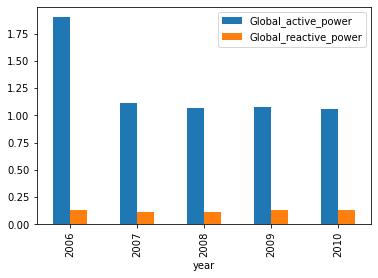

In [25]:
%%time
data_pd.groupby('year')[['Global_active_power','Global_reactive_power']].mean().plot(kind='bar')

CPU times: user 352 ms, sys: 115 ms, total: 468 ms
Wall time: 701 ms


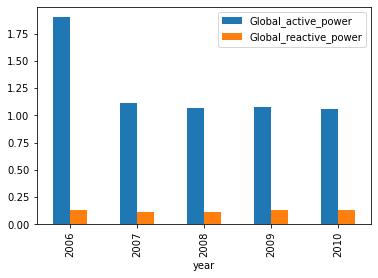

In [26]:
%%time 
data_modin.groupby('year')[['Global_active_power','Global_reactive_power']].mean().plot(kind='bar')